In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\nehal\Documents\GitHub\msba265-finalstorage\data_storage\twitter.csv")

In [3]:
# Display the first few rows
print(data.head())

   No.                                            Message   Source  Label  \
0  1.0  i feel awful about it too because it s my job ...  Twitter    0.0   
1  2.0                              im alone i feel awful  Twitter    0.0   
2  3.0  ive probably mentioned this before but i reall...  Twitter    1.0   
3  4.0           i was feeling a little low few days back  Twitter    0.0   
4  5.0  i beleive that i am much more sensitive to oth...  Twitter    2.0   

   Emotion  
0  sadness  
1  sadness  
2      joy  
3  sadness  
4     love  


In [4]:
# Data Cleaning
# Drop rows with missing values
data_cleaned = data.dropna()

In [5]:
# Remove duplicates based on the 'Message' column
data_cleaned = data_cleaned.drop_duplicates(subset=['Message'])

In [6]:
# Standardize column names
data_cleaned.columns = data_cleaned.columns.str.strip().str.lower().str.replace(" ", "_")

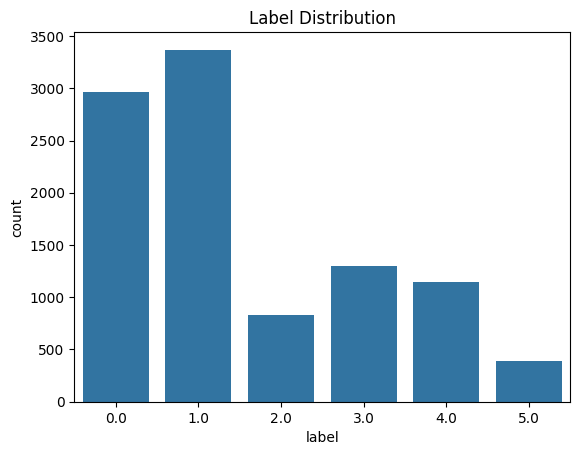

In [7]:
# Exploratory Data Analysis (EDA)
# Distribution of labels
sns.countplot(data=data_cleaned, x='label')
plt.title("Label Distribution")
plt.show()

In [8]:
# Add message length as a feature
data_cleaned['message_length'] = data_cleaned['message'].apply(len)

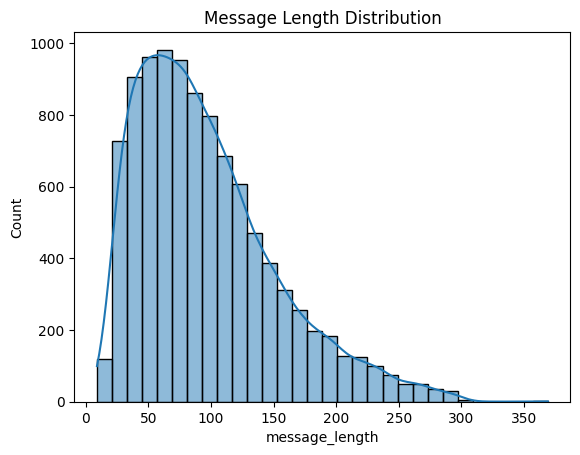

In [9]:
# Plot message length distribution
sns.histplot(data=data_cleaned, x='message_length', bins=30, kde=True)
plt.title("Message Length Distribution")
plt.show()

In [10]:
# Encode the target column
encoder = LabelEncoder()
data_cleaned['label_encoded'] = encoder.fit_transform(data_cleaned['label'])

In [11]:
# Prepare the target variable
y = data_cleaned['label_encoded']

In [12]:
# Initialize SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

In [23]:
# Define models for evaluation
bagging_classifier = BalancedBaggingClassifier(
    estimator=RandomForestClassifier(random_state=42),  # Corrected keyword
    random_state=42,
    n_estimators=10,
    sampling_strategy='auto'
)

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'BalancedBagging': bagging_classifier
}

# Loop through n-gram configurations and evaluate models
for ngram_range in ngram_range_options:
    print(f"Processing n-gram range: {ngram_range}")
    
    # Convert text to vectorized features using N-grams
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english', max_features=500)
    X_vectorized = vectorizer.fit_transform(data_cleaned['message']).toarray()
    
    # Apply SMOTE to handle imbalance
    X_resampled, y_resampled = smote.fit_resample(X_vectorized, y)
    
    for model_name, model in models.items():  # Ensure models is defined before this loop
        print(f"Training model: {model_name}")
        
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        # Store the results
        results[(ngram_range, model_name)] = {'accuracy': acc, 'report': report}

Processing n-gram range: (1, 1)
Training model: LogisticRegression
Training model: RandomForest
Training model: BalancedBagging
Processing n-gram range: (1, 2)
Training model: LogisticRegression
Training model: RandomForest
Training model: BalancedBagging
Processing n-gram range: (1, 3)
Training model: LogisticRegression
Training model: RandomForest
Training model: BalancedBagging


In [24]:
# Display the results for each configuration
for key, value in results.items():
    print(f"Configuration: {key}")
    print(f"Accuracy: {value['accuracy']:.2f}")
    print(f"Classification Report:\n{value['report']}")
    print("\n" + "="*50 + "\n")

Configuration: ((1, 1), 'LogisticRegression')
Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       663
           1       0.82      0.71      0.76       705
           2       0.81      0.63      0.71       674
           3       0.53      0.65      0.58       636
           4       0.49      0.71      0.58       708
           5       0.83      0.70      0.76       657

    accuracy                           0.68      4043
   macro avg       0.71      0.68      0.69      4043
weighted avg       0.71      0.68      0.69      4043



Configuration: ((1, 1), 'RandomForest')
Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.60      0.69       663
           1       0.78      0.63      0.70       705
           2       0.78      0.66      0.71       674
           3       0.61      0.66      0.63       636
           4       0.5